## AST Project 2
### Collaborators: Arian Andalib, Ashley Stone, Jonathan Kho, Emma Oswald
### Michigan State University
### AST 304

In [91]:
########################################################################
# Team Spectacular Stellars: Arian Andalib, Ashley Stone, Jonathan Kho, Emma Oswald
# AST 304, Fall 2022
# Michigan State University
########################################################################
    
# The libraries used
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.constants as sc
%matplotlib inline
from eos import *
from astro_const import *
from observations import *
from structure import *
from test_eos import *
from scipy.optimize import bisect
import pandas as pd

In [26]:
def f(Pc,Mwant,delta_m,eta,xi,mue):
    m,r,p = integrate(Pc,delta_m,eta,xi,mue)
    M = m[-1]
    return(M-Mwant)

In [3]:
# Calibrating alpha/beta for 2.6



In [21]:
# 2.6 Testing integration

M = Msun
mue = 2

Pguess = pressure_guess(M,mue)

delta_m = 1e-4
eta = 1e-6
xi = 0.01

m,r,p = integrate(Pguess,delta_m,eta,xi,mue)


In [47]:
masses = Msun*np.arange(0.1,1.1,0.1)
Pcs = np.zeros(10)
Pguesses = np.zeros(10)

for i in range(len(masses)):
    Pguess = pressure_guess(masses[i],mue)
    Pguesses[i] = Pguess
    Pc = bisect(f,Pguess/100,Pguess,args = (masses[i],delta_m,eta,xi,mue))
    Pcs[i] = Pc

In [51]:
# For 2.6 calibration: off by this factor
Pguesses/Pcs

array([40.09269443, 40.09270145, 40.0926923 , 40.09269571, 40.09270147,
       40.09269932, 40.09269657, 40.09270274, 40.09270293, 40.09269572])

In [48]:
central_pres = density(Pcs,2)
central_pres

array([4.06315457e+07, 1.62526166e+08, 3.65683923e+08, 6.50104719e+08,
       1.01578854e+09, 1.46273554e+09, 1.99094568e+09, 2.60041860e+09,
       3.29115478e+09, 4.06315449e+09])

In [50]:
Radii = np.zeros(10)

for i in range(len(masses)):
    m,r,p = integrate(Pcs[i],delta_m,eta,xi,mue)
    Radii[i] = r[-1]

In [52]:
R = Radii/Rsun
Pcsnorm = Pcs/(G*(masses**2)*Radii**(-4))
central_pres_norm = central_pres/((3*masses)/(4*np.pi*Radii**(3)))

In [89]:
array = np.array([masses/Msun,R,Pcs,Pcsnorm,central_pres,central_pres_norm])
MRdf = pd.DataFrame(array,index = ["$M/M_\odot$","$R/R_\odot$",
                                   "$P_c$","$P_c/(GM^2R^-4)$","$\rho_c$",
                                   "$\rho_c/(3M/4piR^3)$"]).transpose()
MRdf.set_index("$M/M_\odot$")

,$R/R_\odot$,$P_c$,$P_c/(GM^2R^-4)$,$\rho_c$,$\rho_c/(3M/4piR^3)$
$M/M_\odot$,,,,,
0.1,0.027348,1.518033e+19,0.753813,4.063155e+07,5.895168
0.2,0.021707,1.530081e+20,0.753849,1.625262e+08,5.895376
0.3,0.018962,5.911331e+20,0.753802,3.656839e+08,5.895104
0.4,0.017228,1.542225e+21,0.753820,6.501047e+08,5.895205
0.5,0.015993,3.244748e+21,0.753849,1.015789e+09,5.895376
0.6,0.015050,5.958247e+21,0.753838,1.462736e+09,5.895312
0.7,0.014297,9.960348e+21,0.753824,1.990946e+09,5.895231
0.8,0.013674,1.554465e+22,0.753855,2.600419e+09,5.895414
0.9,0.013148,2.301915e+22,0.753856,3.291155e+09,5.895420


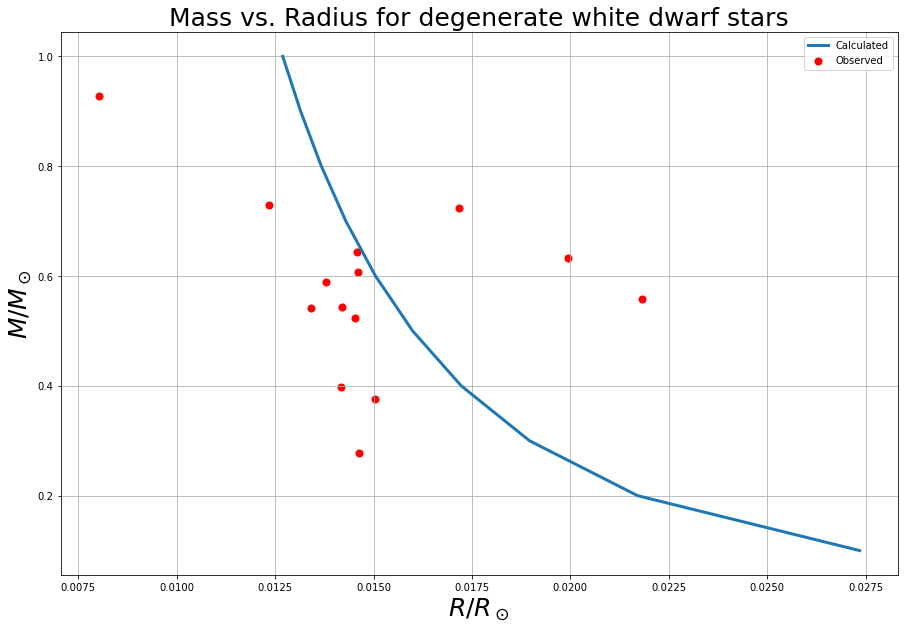

In [131]:
plt.figure(figsize = (15,10))
plt.plot(MRdf["$R/R_\odot$"],MRdf["$M/M_\odot$"],label = "Calculated",lw = 3)
plt.scatter(obs.radii/100,obs.masses,label = "Observed",color = "Red",s = 50)
plt.grid()
plt.ylabel("$M/M_\odot$",size = 25)
plt.xlabel("$R/R_\odot$",size = 25)
plt.title("Mass vs. Radius for degenerate white dwarf stars",size = 25)
plt.legend()